In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler


In [3]:
!pip install finance-datareader

In [4]:
import FinanceDataReader as fdr

AttributeError: module 'html5lib.treebuilders' has no attribute '_base'

In [6]:
df = fdr.DataReader('AAPL', '2018-01-01', '2022-03-20')
df.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-03-14,150.62,151.45,154.12,150.10,108730000.0,-0.0266
2022-03-15,155.09,150.90,155.57,150.38,91850000.0,0.0297
2022-03-16,159.59,157.05,160.00,154.46,101040000.0,0.0290
2022-03-17,160.62,158.61,161.00,157.63,75330000.0,0.0065
2022-03-18,163.98,160.51,164.48,159.76,123510000.0,0.0209


In [7]:
df.head(20)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-02,43.06,42.54,43.08,42.31,102220000.0,0.0177
2018-01-03,43.06,43.13,43.64,42.99,118070000.0,0.0000
2018-01-04,43.26,43.13,43.37,43.02,89740000.0,0.0046
2018-01-05,43.75,43.36,43.84,43.26,94640000.0,0.0113
2018-01-08,43.59,43.59,43.90,43.48,82270000.0,-0.0037
2018-01-09,43.58,43.64,43.77,43.35,86340000.0,-0.0002
2018-01-10,43.57,43.29,43.58,43.25,95840000.0,-0.0002
2018-01-11,43.82,43.65,43.87,43.62,74670000.0,0.0057
2018-01-12,44.27,44.05,44.34,43.91,101670000.0,0.0103


In [9]:
scaler = MinMaxScaler()
price = scaler.fit_transform(df)
price

array([[0.0512768 , 0.04466721, 0.04538939, 0.04741679, 0.15926041,
        0.5889694 ],
       [0.0512768 , 0.04869067, 0.04921166, 0.05215151, 0.20030557,
        0.51771337],
       [0.05264236, 0.04869067, 0.04736878, 0.0523604 , 0.1269422 ,
        0.53623188],
       ...,
       [0.84692066, 0.82555919, 0.84342366, 0.82829689, 0.15620468,
        0.63446055],
       [0.8539533 , 0.83619749, 0.85024913, 0.85036903, 0.08962606,
        0.54388084],
       [0.87689472, 0.84915439, 0.87400177, 0.86519983, 0.214393  ,
        0.60185185]])

In [12]:
window_size = 10
X = []
Y = []

for i in range(len(price) - window_size):
  X.append([price[i+j] for j in range(window_size)])
  Y.append(price[window_size + i][0])

In [13]:
X = np.array(X)
Y = np.array(Y)

In [14]:
X.shape

(1051, 10, 6)

In [15]:
Y.shape

(1051,)

In [16]:
tt_split = 800

x_train = X[:tt_split]
y_train = Y[:tt_split]

x_test = X[tt_split:]
y_test = Y[tt_split:]


In [17]:
x_train.shape

(800, 10, 6)

In [19]:
model = Sequential()
model.add(LSTM(100, input_shape = (10, 6)))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               42800     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 42,901
Trainable params: 42,901
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss = 'mse', optimizer = 'adam')

In [22]:
model.fit(x_train, y_train, epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
25/25 [==============================] - 3s 34ms/step - loss: 0.0111 - val_loss: 0.0068
Epoch 2/20
25/25 [==============================] - 0s 11ms/step - loss: 0.0019 - val_loss: 6.9697e-04
Epoch 3/20
25/25 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/20
25/25 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 6.8016e-04
Epoch 6/20
25/25 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 7/20
25/25 [==============================] - 0s 11ms/step - loss: 8.9661e-04 - val_loss: 9.2723e-04
Epoch 8/20
25/25 [==============================] - 0s 11ms/step - loss: 9.1835e-04 - val_loss: 0.0015
Epoch 9/20
25/25 [==============================] - 0s 11ms/step - loss: 9.0129e-04 - val_loss: 7.6818e-04
Epoch 10/20
25/25 [==============================] - 0s 11ms/step - loss: 7.6305e

In [23]:
x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test)

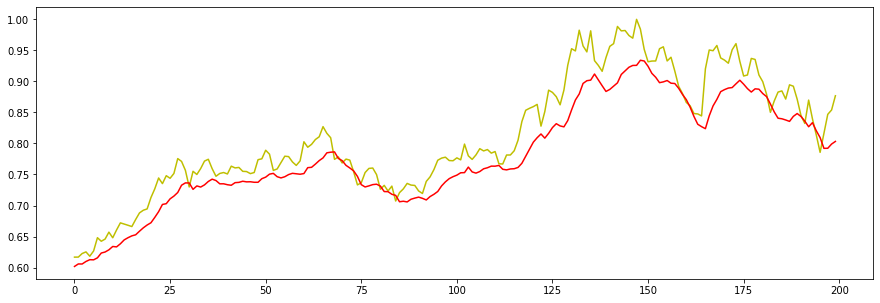

In [27]:
plt.figure(figsize = (15,5))

plt.plot(price[-200:, 0], color = 'y')
plt.plot(x_test_pred[-200:], color = 'r')